# Fake News Detection Using Machine Learning (and Ensemble) Techniques

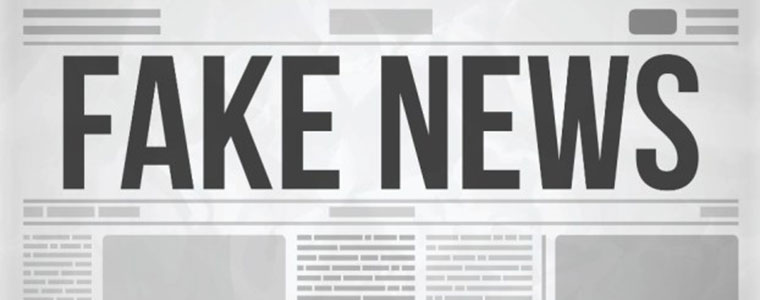
### Table of Contents
> 1. <a href='#project_objective'>Research Overview</a><br>
> 2. <a href='#data_dic'>Data Dictionary</a><br>
> 3. <a href='#data_wrangling'>Data Wrangling</a><br>
> 4.  <a href='#assessing_data'>Assessing Data</a><br>
> 5. <a href='#data_cleaning'>Data Cleaning </a><br>
> 6. <a href='#eda'>Exploratory Data Analysis</a><br>
> 7. <a href='#mlapplication'>Machine Learning Application</a><br>
> 8. <a href='#Conclusion'>Conclusion</a>


<a id='project_objective'></a>
### Research  Overview 
> The emergence of the World Wide Web and the swift uptake of social media platforms like Facebook and Twitter have opened up avenues for the dissemination of information that were previously unprecedented in human history. The current widespread use of social media platforms has resulted in a surge of information creation and sharing by users, surpassing any levels seen before. However, a significant proportion of this information can be misleading and bears no connection to reality. The wide spreading of fake news is a matter of serious concern due to its ability to cause a lot of social and national damage with destructive impacts. To overcome the impact of fake news, this research focus on leveraging the power of machine learning to classify news into `Fake` or `Real`. Four Independent machine learning algorithms were used for news classification, also, an ensemble method was used to strengthen the prediction accuracy. The four algorithms are:
> - 1. Logistic Regression 
> - 2. Decision Tree
> - 3. Naïve Bayes
> - 4. Support Vector Machine
> - 5. While ensemble Ranom Forest was used


<a id='data_dic'></a>
### Data Dictionary 
> There are `6335` instances and `4` columns in the dataset, and below are the columns. The datset used  can be found in [Kaggle website](https://www.kaggle.com/datasets/hassanamin/textdb3).

> 1. `Unnamed: 0`: Seria number
> 2. `title`: The title of the news
> 3. `text`: The body or the news itself
> 4. `label`: The class of the news (Fake or Real)


<a id='data_wrangling'></a>
### Data Wrangling
#### Data Gathering
> This section entails reading the `CSV` file that contains the dataset using Phython `Pandas` library.

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [2]:
# Read the dataset into pandas DataFrame
news_df = pd.read_csv('news_data.csv')

 <a id='assessing_data'></a>
### Data Assessing
> In this section, the dataset was assessed in order to identify both quality and tidiness issues using visual  and programmatic assessement methods.

In [3]:
# Check the first 5 records
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


The `unmaed: 0` is the same thing as the index column for serial number, thus, the `unmaed: 0` will be droped when performing data cleaning. Also, the `label` column will be replace with `class`.

In [4]:
# Check for number of rows and columns
print('Number of rows is',news_df.shape[0])
print('Number of columns',news_df.shape[1])

Number of rows is 6335
Number of columns 4


In [5]:
# Get more information about the dataset
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
# Checking for missing values
news_df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

It can be observed that there is not missing value in the dataset

<a id='data_cleaning'></a>
### Data Cleaning
> Data cleaning will be perfomed to ensure that the data is fit for analysis, model bulding and training.
The cleaning process will involve data transformation, conversion of data into vectors using `Tfidf Vectorizer`, removal of stopwords, punctuations and any irrelevant spaces from the text, dropping columns that are not needed, ensure columsn are in the appropriate datatype among other.

In [7]:
# drop uneedded columns 
news_df = news_df.drop(['Unnamed: 0', 'title'], axis=1)

In [8]:
# Confirm the columns were dropped sucessfully
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6335 non-null   object
 1   label   6335 non-null   object
dtypes: object(2)
memory usage: 99.1+ KB


Left with 2 columns `text` and `lable`.

In [9]:
# Rename the `label` column name with `class`
news_df.rename(columns={'label': 'class'}, inplace=True)

In [10]:
# Confirm the column has been renamed 
for i, v in enumerate(news_df):
    print(i,v)

0 text
1 class


In [11]:
# View random 10 records
news_df.head(10)

,text,class
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
5,"\nI’m not an immigrant, but my grandparents ...",FAKE
6,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,A Czech stockbroker who saved more than 650 Je...,REAL
8,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iranian negotiators reportedly have made a las...,REAL


In [12]:
# Change true and fake into 1 and 0 using the replace() method
news_df['class'].replace(['REAL', 'FAKE'], [1,0], inplace=True)

In [13]:
news_df.head()

,text,class
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


In [14]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6335 non-null   object
 1   class   6335 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.1+ KB


<a id='eda'></a>
### Exploratory Data Analysis & Visualisation
> In this section, the data will be further explored and visualized to get more insights. However, a copy of the cleaned data will be made and used going forward.

In [15]:
# Make a copy of the cleaned data
news_df_clean = news_df.copy()

In [16]:
 news_df_clean['class'].value_counts()

1    3171
0    3164
Name: class, dtype: int64

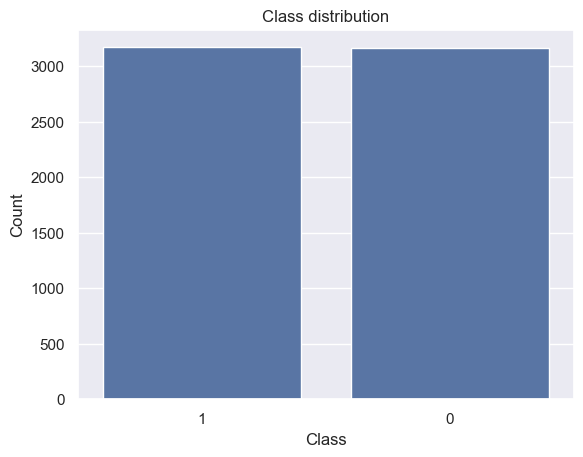

In [17]:
# Visualise the class distribution 
base_color = sns.color_palette()[0]
base_order = news_df_clean['class'].value_counts().index
sns.countplot(data=news_df_clean, x='class', order=base_order, color=base_color)
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count");

It can be observed from the above bar chart that `3171` of the news are fake news, while `3164` are real news. There exist a data balance between the 2 classes, hence, there is no need to perfrom data augmentation.

#### Removal of stopwords, punctuations and any irrelevant spaces from the text
There is need to remove all the stopwords, punctuations and any irrelevant spaces from the text. This will be done using the `NLTK Library`  by downloading some of its modules.



In [18]:
# Import the needed modules from NLTK library
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/justspecial/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justspecial/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Function to preprocess all the data given as input
def preprocess_text(text_data):
    preprocessed_text = []
      
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))
  
    return preprocessed_text

In [20]:
# Call the above function
# Note that this command  will take some time, as it is runing through a fairly large (6335) dataset (so, sit back with a glass of water🥂)

preprocessed_view = preprocess_text(news_df_clean['text'].values)
news_df_clean['text'] = preprocessed_view


100%|██████████████████████████████████████████████████████████████████████| 6335/6335 [13:53<00:00,  7.60it/s]


#### Most frequent used words

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

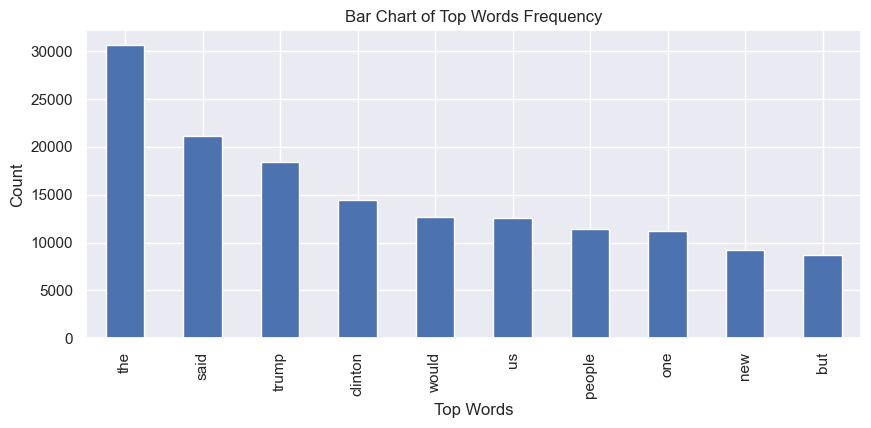

In [21]:

from sklearn.feature_extraction.text import CountVectorizer
#   Function to get the most frequent used words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
common_words = get_top_n_words(news_df_clean['text'], 10)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 4),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

#### WordCloud for fake and real news 

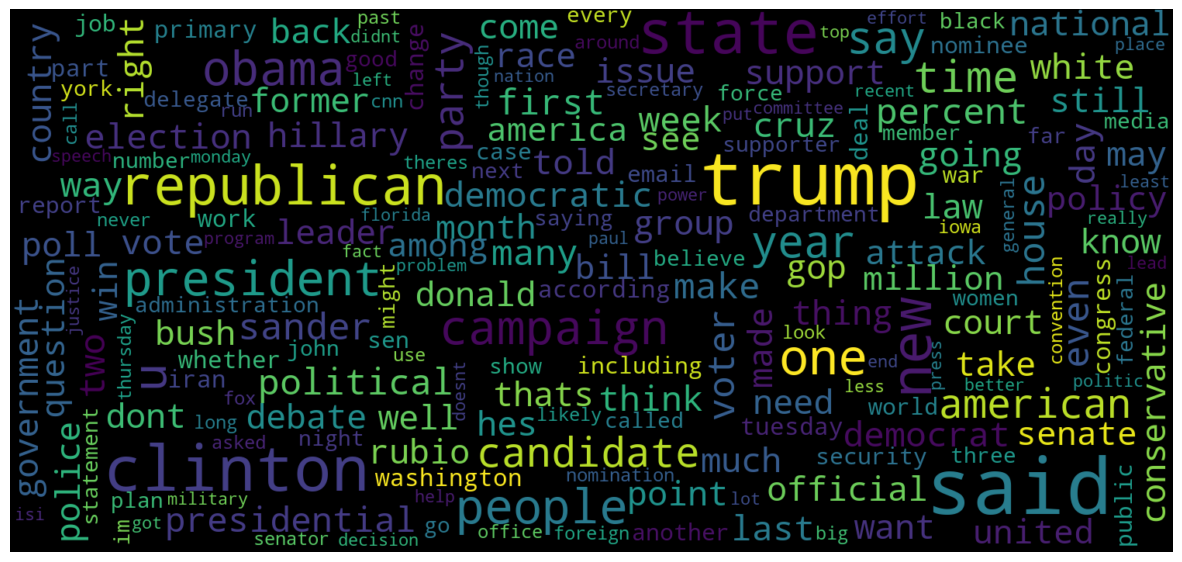

In [22]:
# Real News WordCloud
text = ' '.join(
    word for word in news_df_clean['text'][news_df_clean['class'] == 1].astype(str))
wordCloud = WordCloud(width=1500,
                      height=700,
                      random_state=21,
                      max_font_size=100,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(text), interpolation='bilinear')
plt.axis('off')
plt.show()

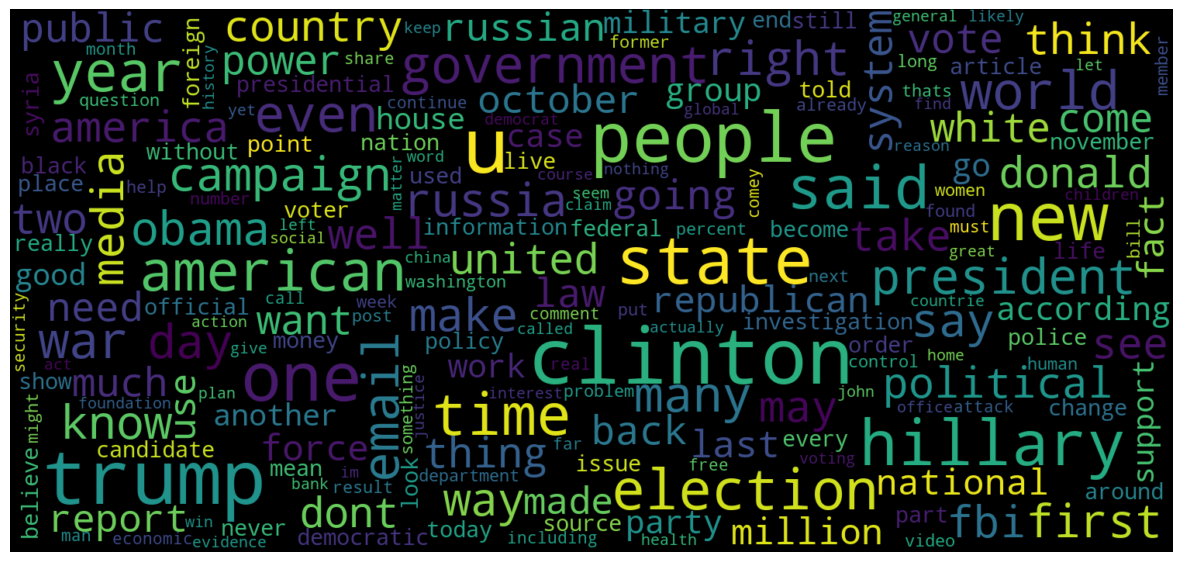

In [23]:
# Fake News WordCloud
text = ' '.join(
    word for word in news_df_clean['text'][news_df_clean['class'] == 0].astype(str))
wordCloud = WordCloud(width=1500,
                      height=700,
                      random_state=21,
                      max_font_size=100,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(text), interpolation='bilinear')
plt.axis('off')
plt.show()

<a id='mlapplication'></a>
### Machine Learning Application
> This section focus on the application of machine learning techniques in the project. This involve converting text into Vectors using  Tfidf Vectorizer, split data into train and test, models building, training, evaluation,  prediction and application of ensemble technique. Basically, four (4) algorithms will be used separately before the application of ensemble technique is applied, these algorithms are: 
> - 1. Logistic Regression 
> - 2. Decision Tree
> - 3. Naïve Bayes
> - 4. Support Vector Machine

> Afterwards, Random Forest ensemble method will be used.

In [24]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(news_df_clean['text'], 
                                                    news_df_clean['class'], 
                                                    test_size=0.30)

Convert the training data into vectors using Tfidf Vectorizer.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
  
vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
X_test = vectorization.transform(X_test)

### Logistic Regression Algorithm

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Create Logistic Regression classifer object
logreg = LogisticRegression()
# Train the classifer
logreg.fit(X_train , y_train)
# Test the model on a new data
y_pred = logreg.predict(X_test)
# Test the model accuracy (i.e, how often is the classifier correct?)
lr_accuracy =  metrics.accuracy_score(y_test,y_pred)

#  Evaluate model performance
print(f'Accuracy: {round(lr_accuracy * 100,2)}%')
print(f'Recall: {round ((metrics.recall_score(y_test,y_pred)) * 100,2)}%')
print(f'Precision: {round ((metrics.precision_score(y_test,y_pred)) * 100,2)}%')
print(f'F-1 Score: {round ((metrics.f1_score(y_test,y_pred)) * 100,2)}%')

Accuracy: 91.27%
Recall: 88.2%
Precision: 94.25%
F-1 Score: 91.12%


### Decision Tree Algorithm

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Create Decision Tree classifer object
decision_tree = DecisionTreeClassifier()
# Train the classifer
decision_tree.fit(X_train, y_train)
# Test the model on a new data
y_pred = decision_tree.predict(X_test)
# Test the model accuracy (i.e, how often is the classifier correct?)
dt_accuracy =  metrics.accuracy_score(y_test,y_pred)

#  Evaluate model performance
print(f'Accuracy: {round(dt_accuracy * 100,2)}%')
print(f'Recall: {round ((metrics.recall_score(y_test,y_pred)) * 100,2)}%')
print(f'Precision: {round ((metrics.precision_score(y_test,y_pred)) * 100,2)}%')
print(f'F-1 Score: {round ((metrics.f1_score(y_test,y_pred)) * 100,2)}%')

Accuracy: 79.91%
Recall: 81.16%
Precision: 79.67%
F-1 Score: 80.41%


### Support Vector Machine Algorithm

In [30]:
from sklearn import svm

In [31]:
# Create Support Vector Machine object ------- This will take a litle time to train the model, this is because SVM is not suitable for a large dataset
svc = svm.SVC()
# Train the classifer
svc.fit(X_train, y_train)
# Test the model on a new data
y_pred = svc.predict(X_test)
# Test the model accuracy (i.e, how often is the classifier correct?)
svm_accuracy = metrics.accuracy_score(y_test, y_pred)

#  Evaluate model performance
print(f'Accuracy: {round(svm_accuracy * 100,2)}%')
print(f'Recall: {round ((metrics.recall_score(y_test,y_pred)) * 100,2)}%')
print(f'Precision: {round ((metrics.precision_score(y_test,y_pred)) * 100,2)}%')
print(f'F-1 Score: {round ((metrics.f1_score(y_test,y_pred)) * 100,2)}%')


Accuracy: 93.0%
Recall: 89.44%
Precision: 96.54%
F-1 Score: 92.85%


### Naïve Bayes Algorithm

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
# Create Gaussian Naïve Bayes classifer object
gaussianNB = GaussianNB()
# Train the classifer
gaussianNB = gaussianNB.fit(X_train.toarray(), y_train)
# Test the model on a new data
y_pred = gaussianNB.predict(X_test.toarray())
# Test the model accuracy (i.e, how often is the classifier correct?)
nb_accuracy =  metrics.accuracy_score(y_test,y_pred)

#  Evaluate model performance
print(f'Accuracy: {round(nb_accuracy * 100,2)}%     ')
print(f'Recall: {round ((metrics.recall_score(y_test,y_pred)) * 100,2)}%')
print(f'Precision: {round ((metrics.precision_score(y_test,y_pred)) * 100,2)}%')
print(f'F-1 Score: {round ((metrics.f1_score(y_test,y_pred)) * 100,2)}%')


Accuracy: 83.64%
Recall: 89.03%
Precision: 80.75%
F-1 Score: 84.69%


### Random Forest Ensemble Method

In [34]:
# The command in this cell will take a little time to complete execution, so, sit back with a glass of water🥂 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier(n_estimators=50, random_state=0) # 50 trees. 
svm = SVC(probability=True, random_state=0) # probability calculation
logreg = LogisticRegression(random_state=0)
gaussianNB = GaussianNB()
decision_tree = DecisionTreeClassifier()

# Constructing the ensemble classifier by mentioning the individual classifiers.
ensemble = VotingClassifier(estimators = [('rfc',rfc), ('svm',svm), ('logreg',logreg), ('gaussianNB',gaussianNB), ('decision_tree',decision_tree)], voting='soft') 

# clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf), ('nb',nbClf), ('dtClf',dtClf)], voting='soft') 

# Train the ensemble classifier
ensemble.fit(X_train.toarray(), y_train)
# Test the ensemble model on a new data
y_pred = ensemble.predict(X_test.toarray())
# Test the ensemble model accuracy
ensemble_accuracy =  metrics.accuracy_score(y_test,y_pred)

#  Evaluate the ensemble model performance
print(f'Accuracy: {round(ensemble_accuracy * 100,2)}%')
print(f'Recall: {round ((metrics.recall_score(y_test,y_pred)) * 100,2)}%')
print(f'Precision: {round ((metrics.precision_score(y_test,y_pred)) * 100,2)}%')
print(f'F-1 Score: {round ((metrics.f1_score(y_test,y_pred)) * 100,2)}%')

Accuracy: 92.53%
Recall: 92.13%
Precision: 93.1%
F-1 Score: 92.61%


### K-Fold Cross Validation Technique

In [35]:
from sklearn.model_selection import cross_val_score


In [81]:
# Validate the ensembler model using K-Fold Cross Validation Technique with 10 folds
cv_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
print("Cross Validation Scores: ", cv_scores)
print("Average Cross Validation Score: ", cv_scores.mean())


Cross Validation Scores:  [0.87387387 0.86261261 0.87387387 0.87612613 0.86230248 0.86681716
 0.90519187 0.90519187 0.88939052 0.89164786]
Average Cross Validation Score:  0.8807028247208833


### Confusion Matrix

In [37]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[869  66]
 [ 76 890]]


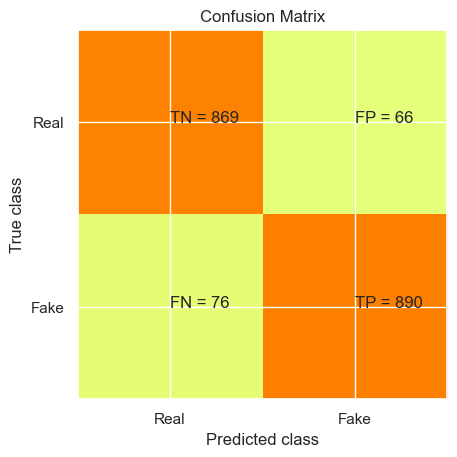

In [83]:
# Visualise the confusion matrix
plt.clf()
classNames = ["Real", "Fake"]
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
v = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(v[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

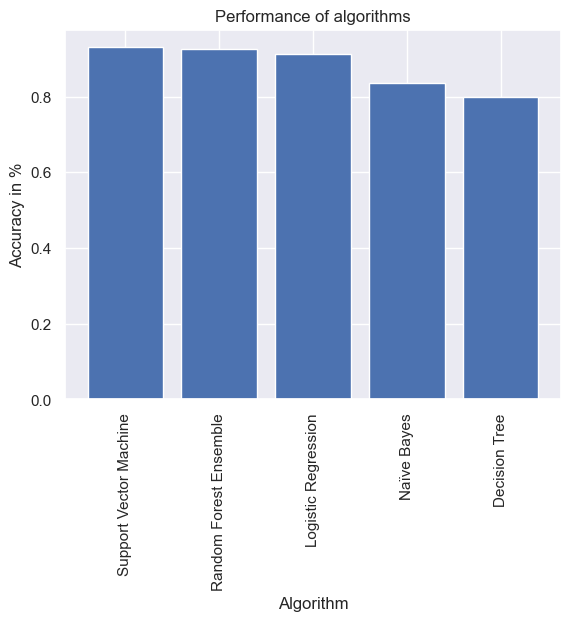

In [78]:
# data
x = np.array(["Naïve Bayes", "Decision Tree", "Logistic Regression", "Support Vector Machine", "Random Forest Ensemble"])
y = np.array([nb_accuracy, dt_accuracy, lr_accuracy, svm_accuracy, ensemble_accuracy])

# sort the values based on y in descending order
sort_index = np.argsort(y)[::-1]
sorted_x = x[sort_index]  
sorted_y = y[sort_index]

# plot the sorted bar chart
plt.bar(sorted_x, sorted_y)
plt.title("Performance of algorithms")
plt.ylabel("Accuracy in %")
plt.xlabel("Algorithm")
plt.xticks(rotation=90)
plt.show()

It can be observed from above bar chart that Support Vector Machine has the highest accuracy of `93%` among the four  independent algorithms used, while Decision Tree has teh list with `79%`. Random Forest Ensemble recorded 93% accuracy, outperformed all the used algorithms except Support Vector Machine.  

### Conclusion
> The power of machine learning has been leveraged in this research to clasify news into `Real` `Fake`. Out of the four algorithms used, `Support Vector Machine` recorded the highest accuracy of `93%`, followed by `Logistic Regression` with `91`%, followed by `Naïve Bayes` with 84%, while `Decision Tree` recorded the least acuracy with `80%`.
> The `Ensemble Learning` method recorded `93%` accuracy, which outperformed all the used algorithms except Support Vector Machine. <br>
> It would be fair to say that using an ensemble technique is a good practice as it create multiple models and then combine them to produce improved results. The Ensemble methods usually produces more accurate solutions than a single model would as demonstrated in this reseaerch.
